In [7]:
import numpy as np
import matplotlib.pyplot as plt

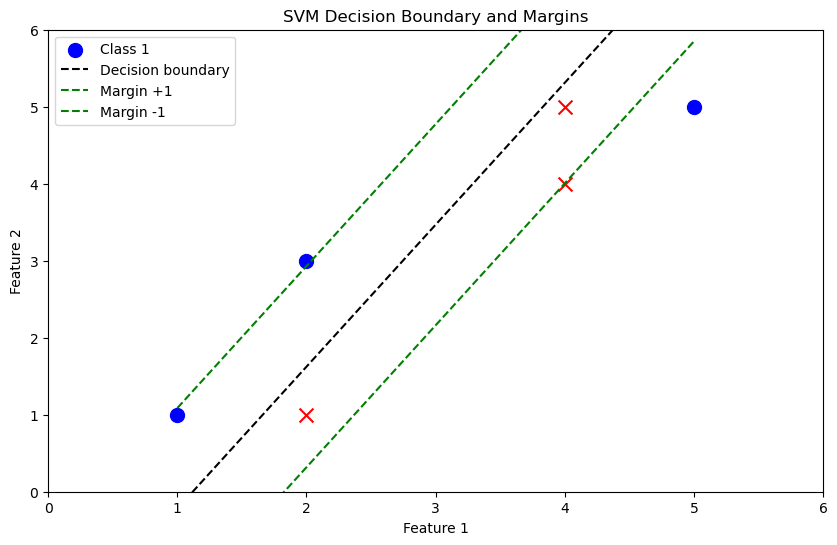

In [13]:


class SVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        y = np.where(y <= 0, -1, 1)
        
        self.w = np.zeros(n_features)
        self.b = 0
        
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y[idx]))
                    self.b -= self.lr * y[idx]
    
    def predict(self, x):
        approx = np.dot(x, self.w) - self.b
        return np.sign(approx)

    def plot_hyperplanes(self, X, y):
        def get_hyperplane_value(x, w, b, offset):
            return (-w[0] * x + b + offset) / w[1]
        
        plt.figure(figsize=(10, 6))
        
        # Plotting the data points
        for idx, label in enumerate(y):
            if label == 1:
                plt.scatter(X[idx][0], X[idx][1], color='b', marker='o', s=100, label="Class 1" if idx == 0 else "")
            else:
                plt.scatter(X[idx][0], X[idx][1], color='r', marker='x', s=100, label="Class -1" if idx == 0 else "")
        
        # Plot the decision boundary and margins
        x0_1 = np.amin(X[:, 0])
        x0_2 = np.amax(X[:, 0])
        
        # Decision boundary
        x1_1 = get_hyperplane_value(x0_1, self.w, self.b, 0)
        x1_2 = get_hyperplane_value(x0_2, self.w, self.b, 0)
        plt.plot([x0_1, x0_2], [x1_1, x1_2], 'k--', label="Decision boundary")
        
        # Positive margin
        x1_1 = get_hyperplane_value(x0_1, self.w, self.b, 1)
        x1_2 = get_hyperplane_value(x0_2, self.w, self.b, 1)
        plt.plot([x0_1, x0_2], [x1_1, x1_2], 'g--', label="Margin +1")
        
        # Negative margin
        x1_1 = get_hyperplane_value(x0_1, self.w, self.b, -1)
        x1_2 = get_hyperplane_value(x0_2, self.w, self.b, -1)
        plt.plot([x0_1, x0_2], [x1_1, x1_2], 'g--', label="Margin -1")
        
        # Axis limits and labels
        plt.xlim([x0_1 - 1, x0_2 + 1])
        plt.ylim([np.amin(X[:, 1]) - 1, np.amax(X[:, 1]) + 1])
        plt.xlabel("Feature 1")
        plt.ylabel("Feature 2")
        plt.legend()
        plt.title("SVM Decision Boundary and Margins")
        plt.show()

\if __name__ == "__main__":
    
    X = np.array([
        [2, 3],
        [1, 1],
        [2, 1],
        [4, 5],
        [5, 5],
        [4, 4]
    ])
    y = np.array([1, 1, -1, -1, 1, -1])

    # Initialize and train the SVM
    clf = SVM(learning_rate=0.01, lambda_param=0.01, n_iters=1000)
    clf.fit(X, y)

    # Plot the data points and hyperplanes
    clf.plot_hyperplanes(X, y)


In [9]:
# Test the SVM class
if __name__ == "__main__":
    # Creating a simple linearly separable dataset
    X = np.array([
        [2, 3],
        [1, 1],
        [2, 1],
        [4, 5],
        [5, 5],
        [4, 4]
    ])
    y = np.array([1, 1, -1, -1, 1, -1])

    # Initialize and train the SVM
    clf = SVM(learning_rate=0.001, lambda_param=0.01, n_iters=1000)
    clf.fit(X, y)

    # Test predictions
    predictions = clf.predict(X)
    print("Predictions:", predictions)
    print("True labels:", y)


Predictions: [-1. -1. -1. -1. -1. -1.]
True labels: [ 1  1 -1 -1  1 -1]
